<a href="https://colab.research.google.com/github/ghafoor545/DEP-_ML/blob/main/Week_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Required Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# **2. Load and Preprocess the Dataset**

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


# **3. Data Augmentation**

In [3]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(x_train)


# **4. Building the Convolutional Neural Network (CNN)**

In [4]:
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

# Dropout layer to prevent overfitting
model.add(layers.Dropout(0.5))

# Output Layer with softmax activation (10 categories)
model.add(layers.Dense(10, activation='softmax'))

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,506 (353.54 KB)

 Trainable params: 90,506 (353.54 KB)

 Non-trainable params: 0 (0.00 B)

# **5. Compile the Model**

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# **6. Train the Model**

In [6]:
# Train the model using the augmented data generator
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=x_train.shape[0] // 64,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 105s 132ms/step - accuracy: 0.2523 - loss: 1.9939 - val_accuracy: 0.4625 - val_loss: 1.5053
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.4844 - loss: 1.4946

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4844 - loss: 1.4946 - val_accuracy: 0.4528 - val_loss: 1.5303
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 129s 120ms/step - accuracy: 0.4348 - loss: 1.5580 - val_accuracy: 0.5211 - val_loss: 1.3505
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4531 - loss: 1.5230 - val_accuracy: 0.5391 - val_loss: 1.2893
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 137s 118ms/step - accuracy: 0.4883 - loss: 1.4193 - val_accuracy: 0.5581 - val_loss: 1.2447
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5156 - loss: 1.2086 - val_accuracy: 0.5540 - val_loss: 1.2377
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.5235 - loss: 1.3444 - val_accuracy: 0.5969 - val_loss: 1.1397
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4531 - loss: 1.5785 - val_accuracy: 0.5959 - val_loss: 1.1405
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.5453 - loss: 1.2809 - val_accuracy:

# **7. Evaluate the Model**

In [7]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


313/313 - 3s - 10ms/step - accuracy: 0.6659 - loss: 0.9443
Test accuracy: 0.67


# **8. Visualize Training History**

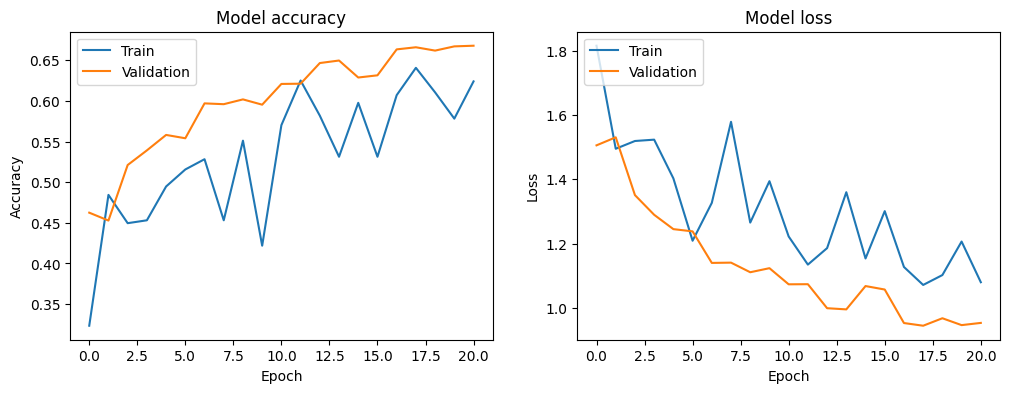

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


# **Make Predictions on Test Data**

In [10]:
# Predict the classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Display the first few predictions and actual labels
print("Predicted labels:", y_pred_classes[:10])
print("Actual labels:   ", y_true[:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Predicted labels: [3 1 1 8 6 6 1 6 3 1]
Actual labels:    [3 8 8 0 6 6 1 6 3 1]


# **Visualize Predictions**

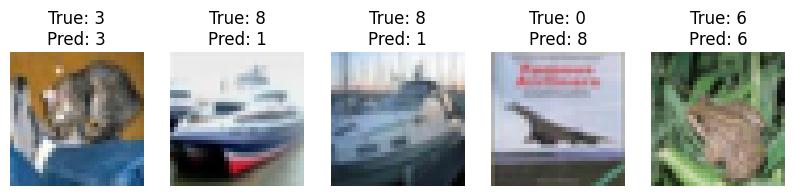

In [11]:
# Visualize the first 5 test images, predicted labels, and true labels
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {y_true[i]}\nPred: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()


# **Generate a Confusion Matrix**

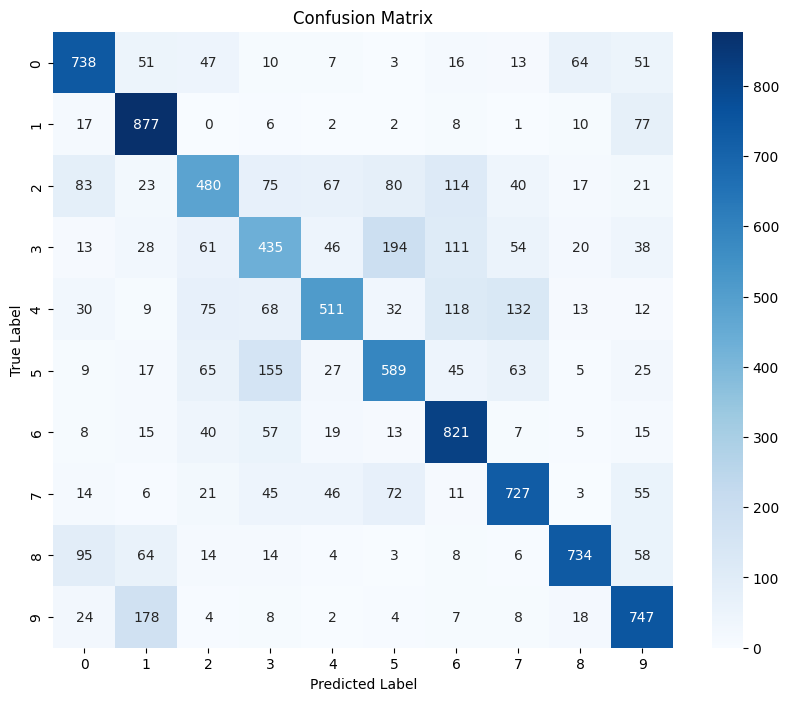

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
